In [4]:
library(janitor)
library(tidyverse)
library(ggplot2)
library(gridExtra)
options(encoding = "UTF-8")

In [5]:
data <- read.csv("../data/diabetes_012_health_indicators_BRFSS2015.csv", na=c("", "NA", "N/A")) |> clean_names()
glimpse(data)

Rows: 253,680
Columns: 22
$ diabetes_012           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0,~
$ high_bp                <dbl> 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,~
$ high_chol              <dbl> 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,~
$ chol_check             <dbl> 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,~
$ bmi                    <dbl> 40, 25, 28, 27, 24, 25, 30, 25, 30, 24, 25, 34,~
$ smoker                 <dbl> 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,~
$ stroke                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,~
$ heart_diseaseor_attack <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,~
$ phys_activity          <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,~
$ fruits                 <dbl> 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,~
$ veggies                <dbl> 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,~
$ hvy_alcohol_consump    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ any_healthca

Xu ly du lieu khuyet

Tổng cộng có 22 cột, và tất cả các cột đều ở định dạng `<dbl>`, nghĩa là định dạng số, chúng ta sẽ cùng xem xét xem biến nào là biến định lượng và biến nào là biến định tính

In [6]:
unique_counts <- data.frame(
    variable = names(data),
    unique_count = sapply(data, function(x) length(unique(x)))
)
print(unique_counts)

                                     variable unique_count
diabetes_012                     diabetes_012            3
high_bp                               high_bp            2
high_chol                           high_chol            2
chol_check                         chol_check            2
bmi                                       bmi           84
smoker                                 smoker            2
stroke                                 stroke            2
heart_diseaseor_attack heart_diseaseor_attack            2
phys_activity                   phys_activity            2
fruits                                 fruits            2
veggies                               veggies            2
hvy_alcohol_consump       hvy_alcohol_consump            2
any_healthcare                 any_healthcare            2
no_docbc_cost                   no_docbc_cost            2
gen_hlth                             gen_hlth            5
ment_hlth                           ment_hlth           

Theo như chi tiết về bộ dữ liệu, thì ta có tất cả là biến định tính, chỉ có `bmi`, `ment_hlth`, `phys_hlth` là biến định lượng.

In [7]:
qualitative_vars <- unique_counts |> filter(unique_count <= 13) 
qualitative_vars = qualitative_vars$variable

quantitative_vars <- c("bmi", "ment_hlth", "phys_hlth")

print(qualitative_vars)

print(quantitative_vars)

# Convert qualitative variables to factors
data[qualitative_vars] <- lapply(data[qualitative_vars], as.factor)

 [1] "diabetes_012"           "high_bp"                "high_chol"             
 [4] "chol_check"             "smoker"                 "stroke"                
 [7] "heart_diseaseor_attack" "phys_activity"          "fruits"                
[10] "veggies"                "hvy_alcohol_consump"    "any_healthcare"        
[13] "no_docbc_cost"          "gen_hlth"               "diff_walk"             
[16] "sex"                    "age"                    "education"             
[19] "income"                
[1] "bmi"       "ment_hlth" "phys_hlth"


In [8]:
write.csv(data, "../data/cleaned_data.csv", row.names = FALSE)

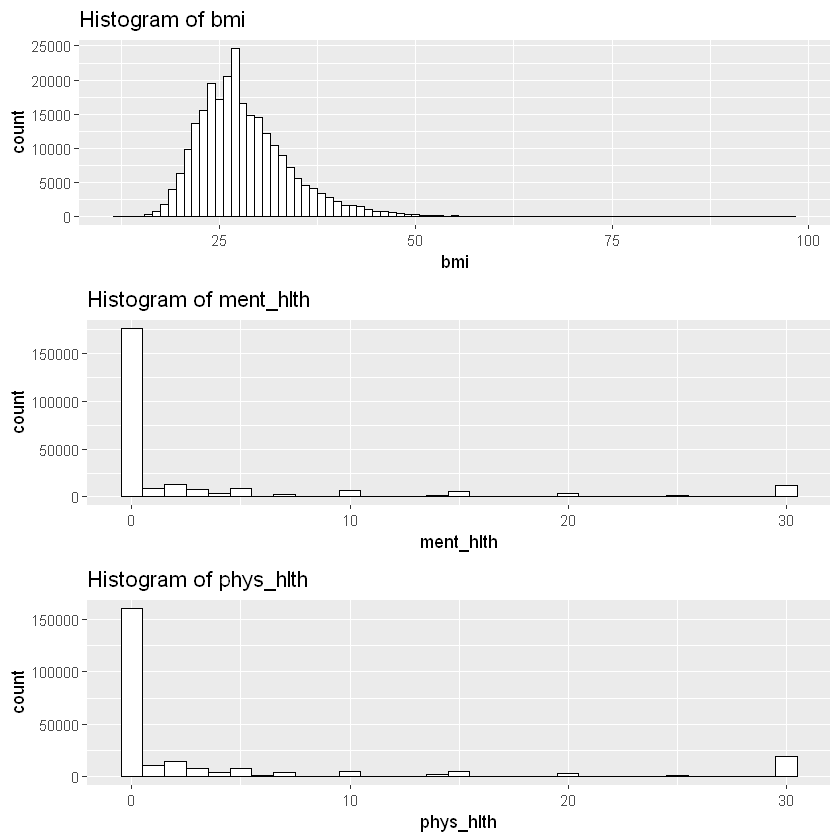

In [9]:
plots <- lapply(quantitative_vars, function(var) {
    ggplot(data = data, aes(x = !!sym(var))) +
        geom_histogram(fill = "white", color = "black", binwidth = 1) +
        ggtitle(paste("Histogram of", var))
})

do.call(grid.arrange, c(plots, ncol = 1))

- Chỉ số BMI tập trung nhiều ở vùng 23-30
- `ment_hlth` và `phys_hlth` tập trung ở 0 rất nhiều, tiếp theo là 30. Các giá trị còn lại rất ít

In [10]:
summary_stats <- data |> 
    summarise(across(all_of(quantitative_vars), list(
        mean = ~mean(.),
        median = ~median(.),
        sd = ~sd(.),
        max = ~max(.),
        min = ~min(.)
    ), .names = "{col}_{fn}"))

summary_stats_t <- as.data.frame(t(summary_stats))
print(summary_stats_t)

                        V1
bmi_mean         28.382364
bmi_median       27.000000
bmi_sd            6.608694
bmi_max          98.000000
bmi_min          12.000000
ment_hlth_mean    3.184772
ment_hlth_median  0.000000
ment_hlth_sd      7.412847
ment_hlth_max    30.000000
ment_hlth_min     0.000000
phys_hlth_mean    4.242081
phys_hlth_median  0.000000
phys_hlth_sd      8.717951
phys_hlth_max    30.000000
phys_hlth_min     0.000000


## Plot từng biến định lượng một (bar chart)

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
i Please use tidy evaluation idioms with `aes()`.
i See also `vignette("ggplot2-in-packages")` for more information."


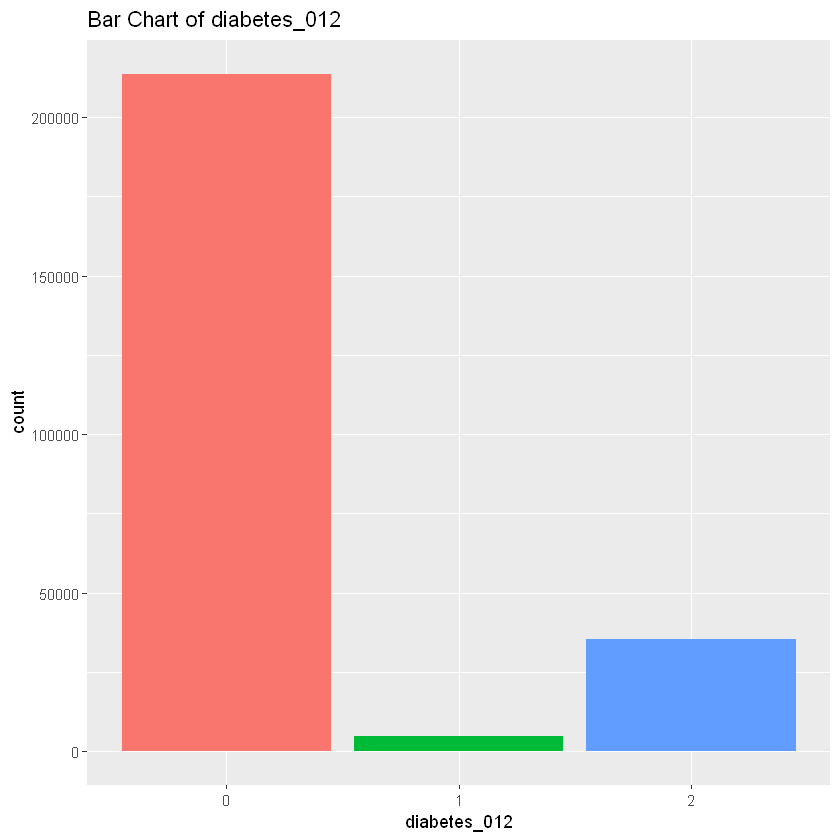

In [11]:
plot_var = qualitative_vars[1]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Bộ dữ liệu này, số điểm quan sát không bị mắc bệnh tiểu đường là nhiều nhất, tiếp theo là đã bị tiểu đường ít nhất là tiền tiểu đường. Sự chênh lệch lớn giữa nhóm không mắc bệnh (0) và hai nhóm mắc bệnh (1 và 2) có thể gây mất cân bằng dữ liệu. Điều này có thể cần được xử lý nếu áp dụng các mô hình phân tích hoặc học máy để đảm bảo độ chính xác cao hơn.

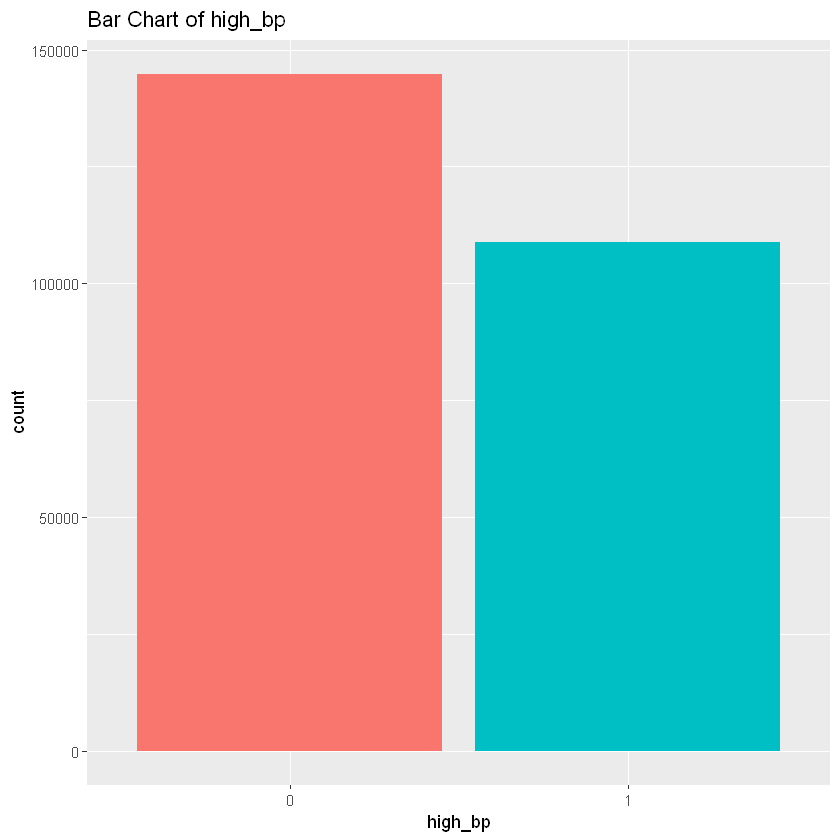

In [12]:
plot_var = qualitative_vars[2]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Ta có các quan sát mắc tình trạng cao huyết áp ít hơn các quan sát bình thường, chênh lệch khoảng 30.000-40.000 người

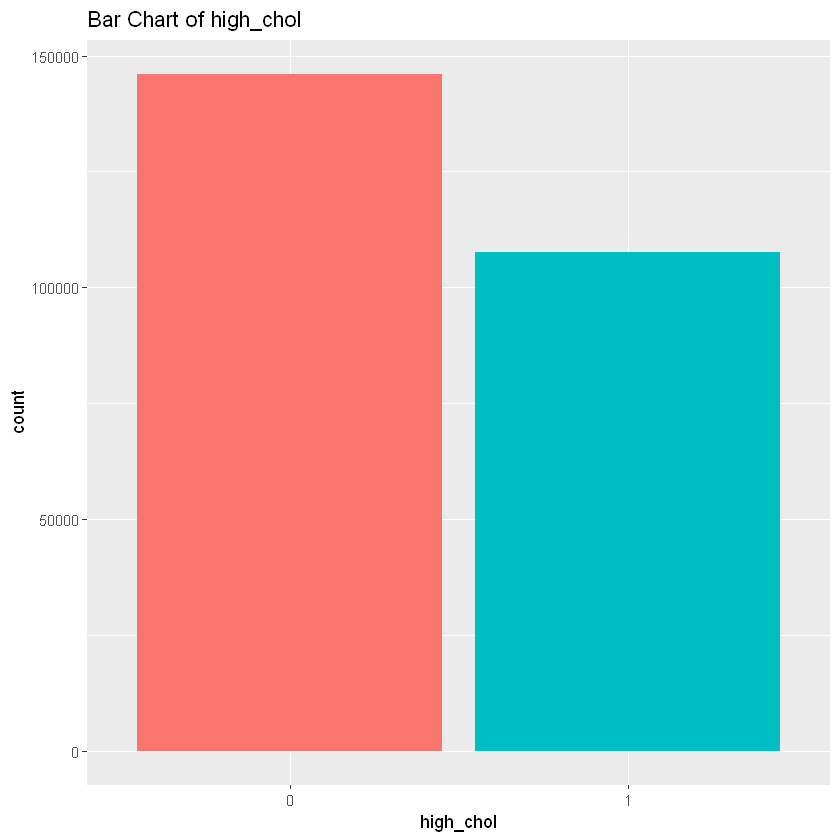

In [13]:
plot_var = qualitative_vars[3]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Tương tự tình trạng cholesterol cao cũng vậy

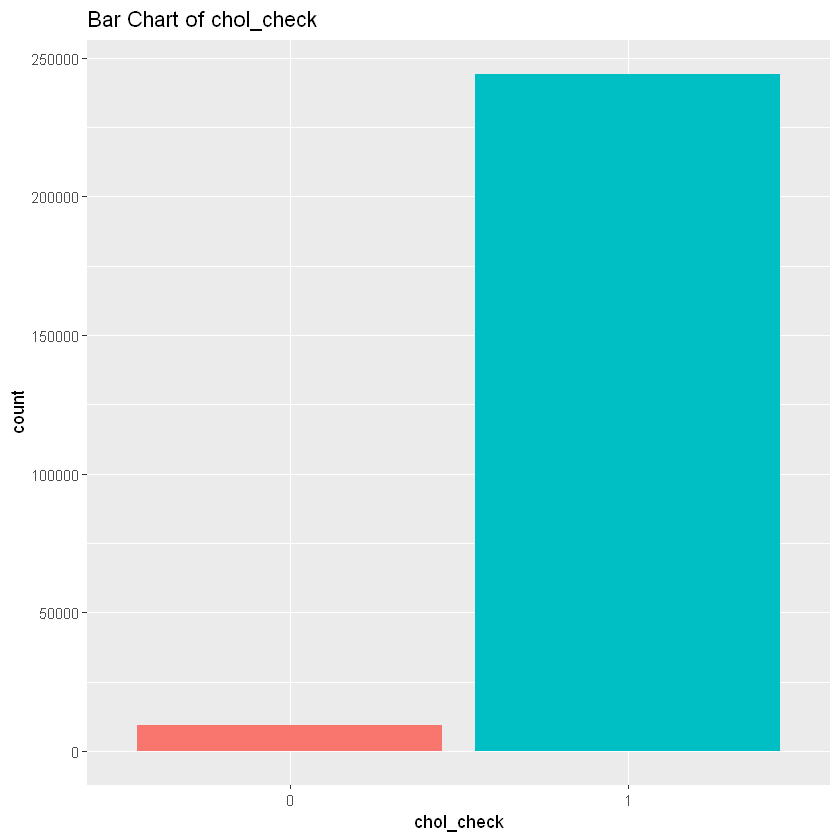

In [14]:
plot_var = qualitative_vars[4]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Ta thấy được các quan sát đa số đã kiểm tra cholesterol trong 5 năm. Một số rất ít là vẫn chưa kiểm tra

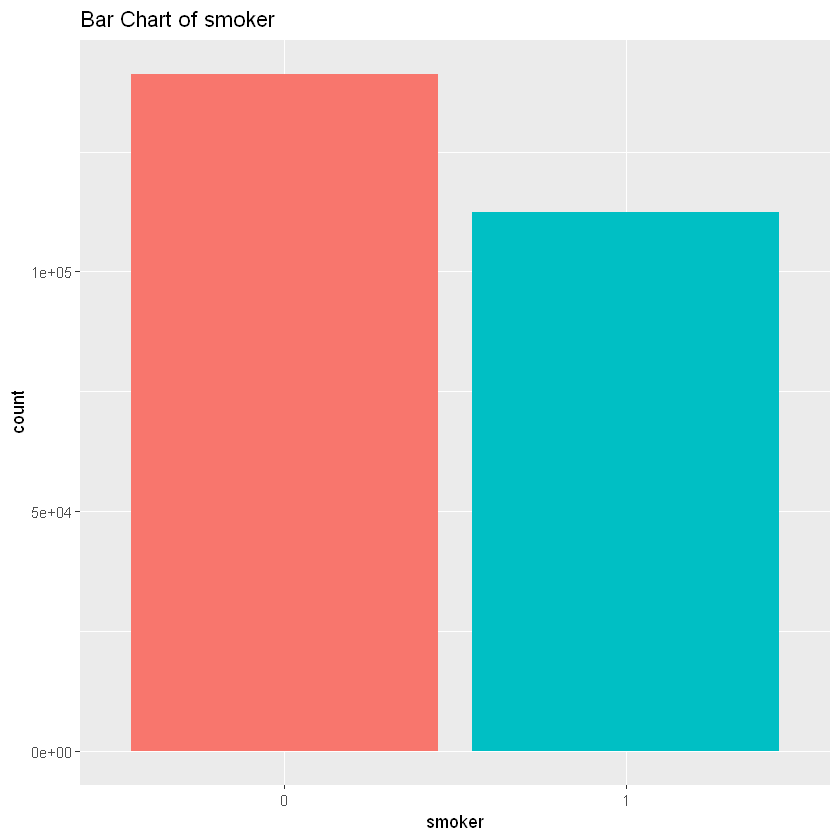

In [15]:
plot_var = qualitative_vars[5]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Tỉ lệ người hút nhiều thuốc cao hơn tỉ lệ người ít hút thuốc hơn.

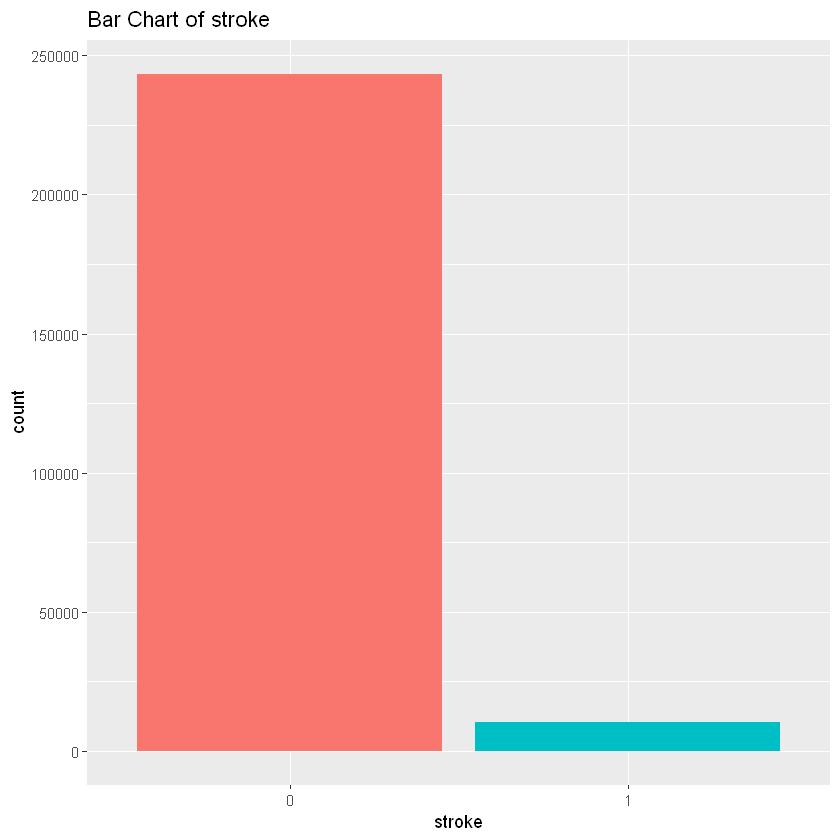

In [16]:
plot_var = qualitative_vars[6]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Đa số các quan sát đều chưa từng bị đột quỵ

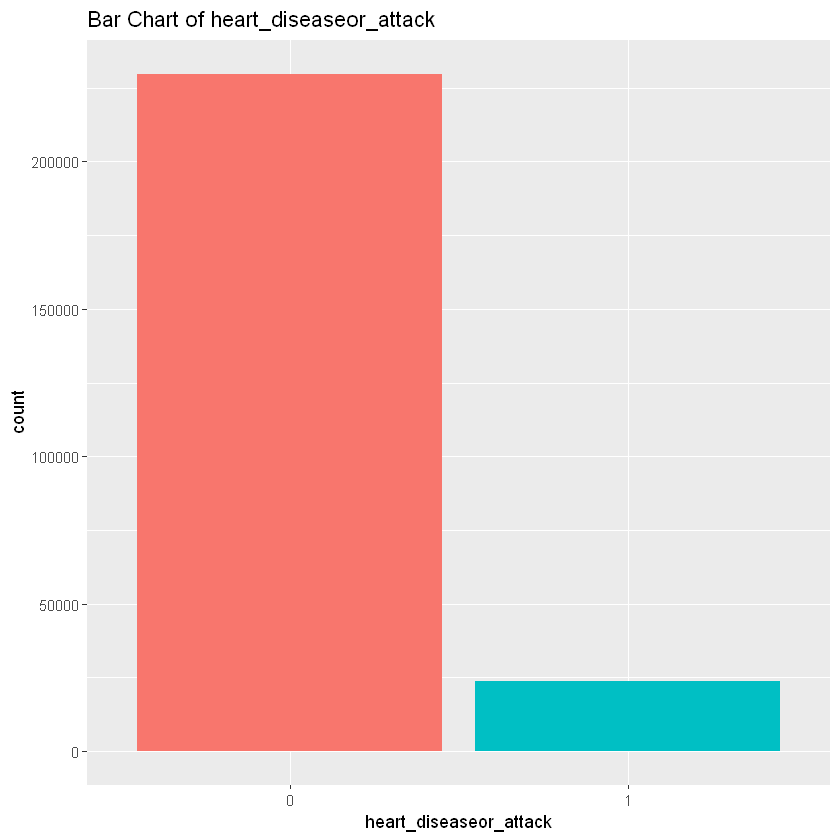

In [17]:
plot_var = qualitative_vars[7]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Đa số các quan sát không bị bệnh tim mạch vành (CHD) hoặc nhồi máu cơ tim (MI)

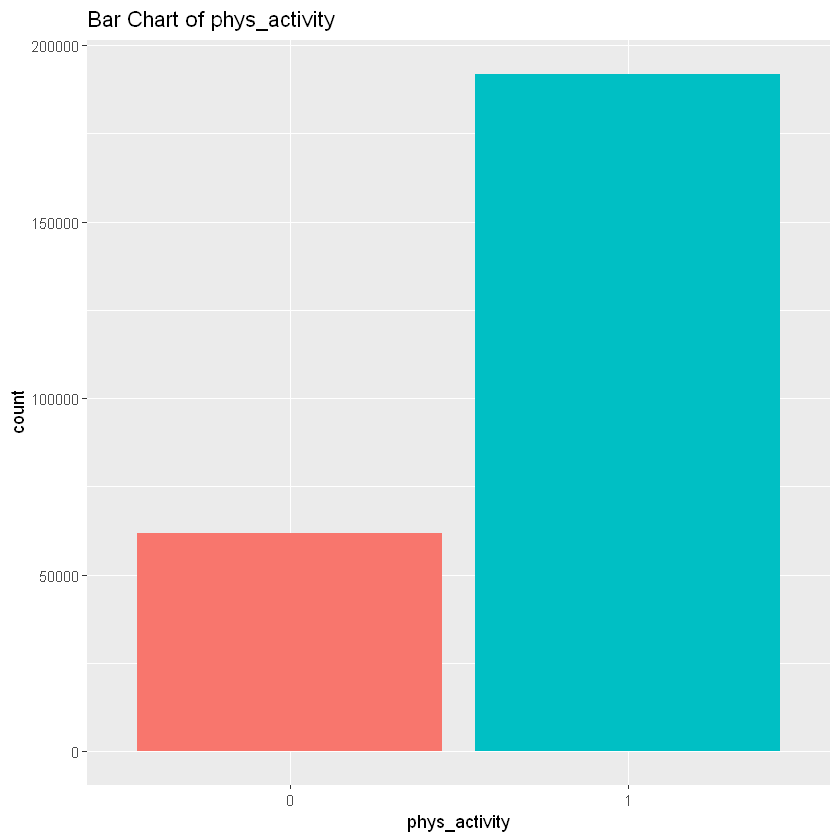

In [18]:
plot_var = qualitative_vars[8]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Các quan sát rất tích cực hoạt động thể chất trong vòng 30 ngày, và khoảng hơn 1/5 quan sát không thực hiện việc đó.

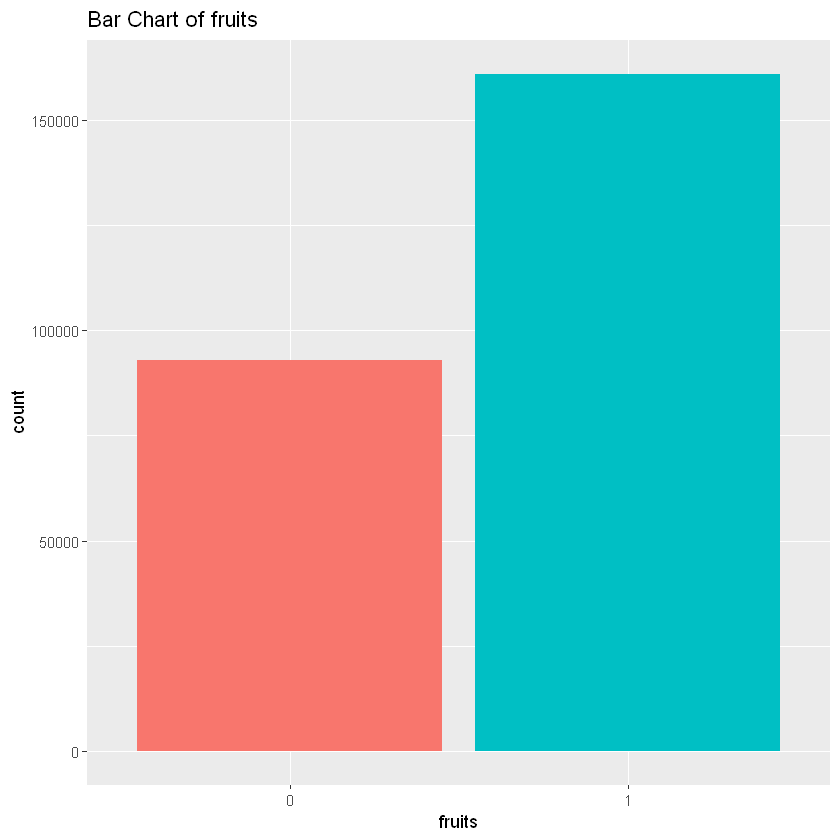

In [19]:
plot_var = qualitative_vars[9]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Số người ăn trái cây ít nhất một ngày gần gấp đôi số người không.

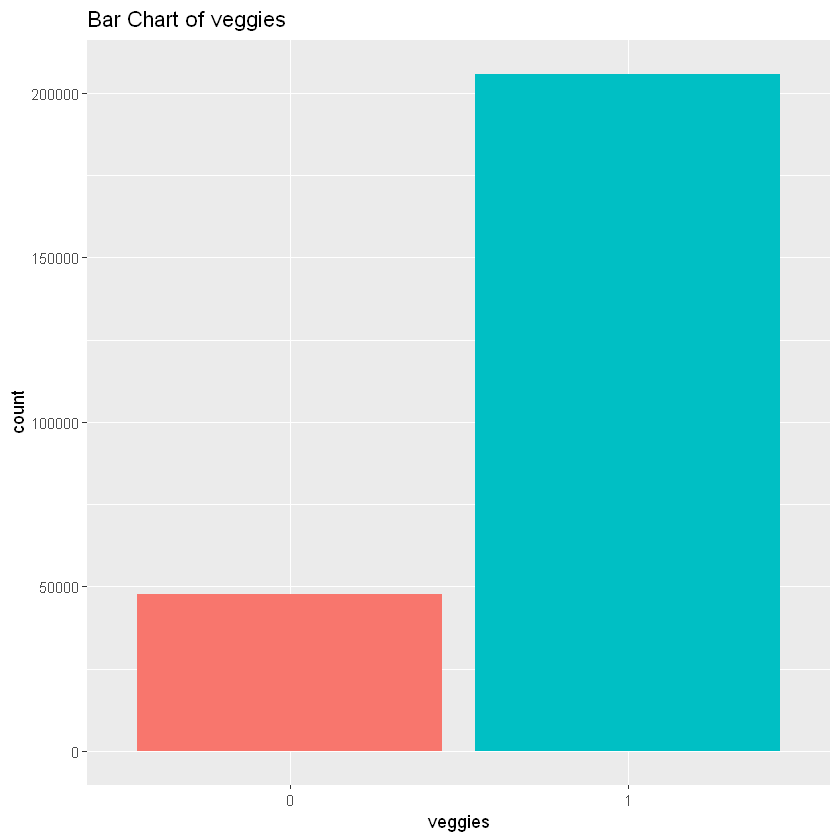

In [20]:
plot_var = qualitative_vars[10]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Đối với việc ăn rau củ quả mỗi ngày thì các quan sát có thực hiện việc đó rất nhiều chiếm hơn 4/5 toàn bộ quan sát

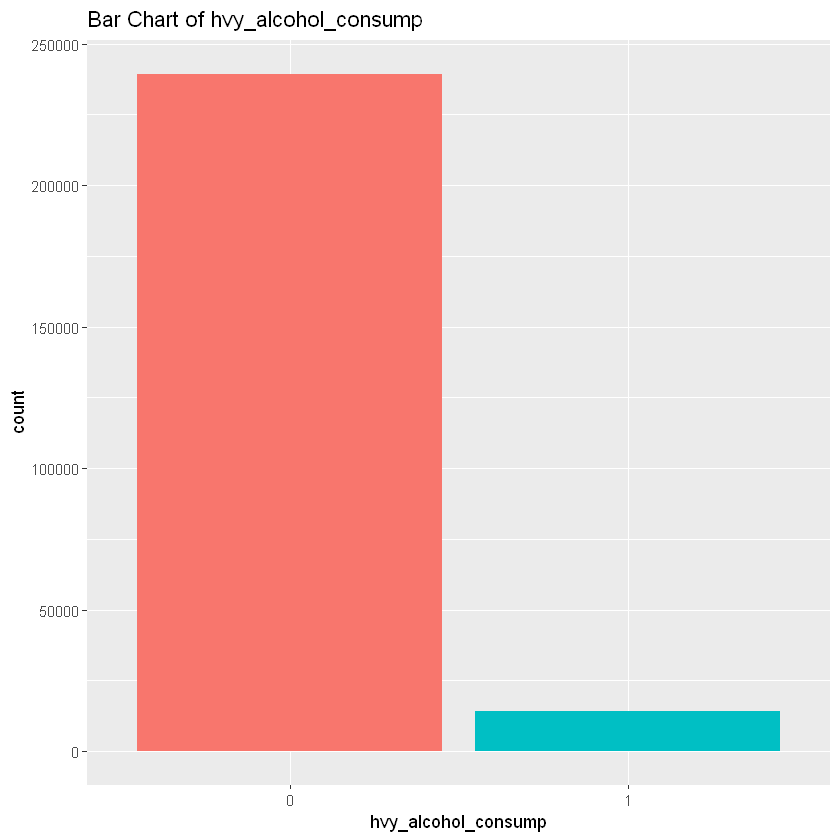

In [21]:
plot_var = qualitative_vars[11]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Đa số các quan sát đều không uống nhiều rượu

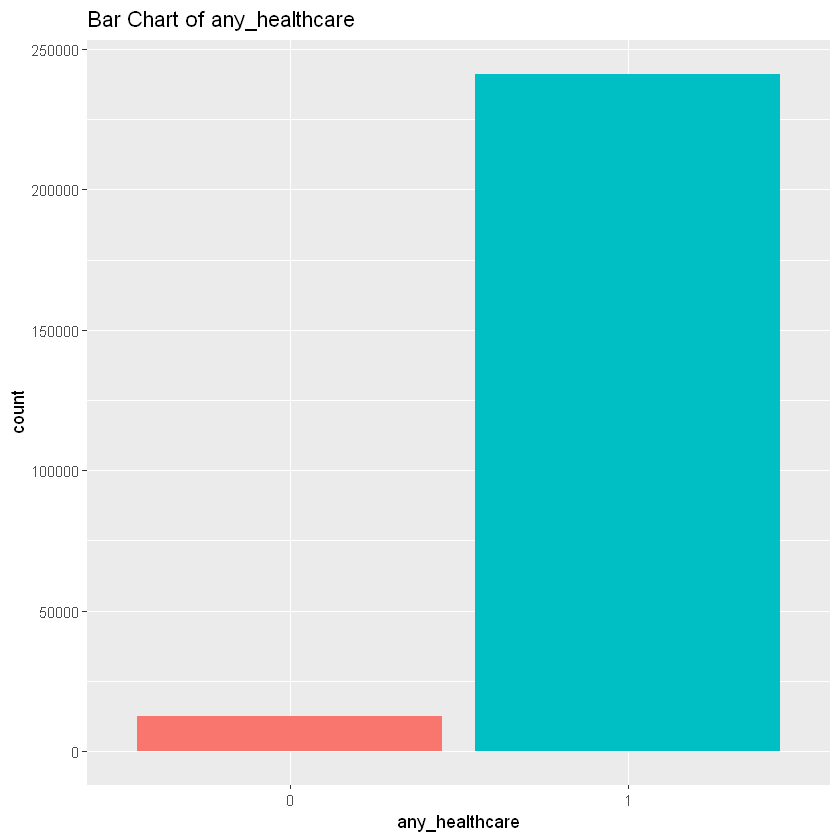

In [22]:
plot_var = qualitative_vars[12]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Đa số các quan sát đều đã có tiếp cận các dịch vụ sức khỏe

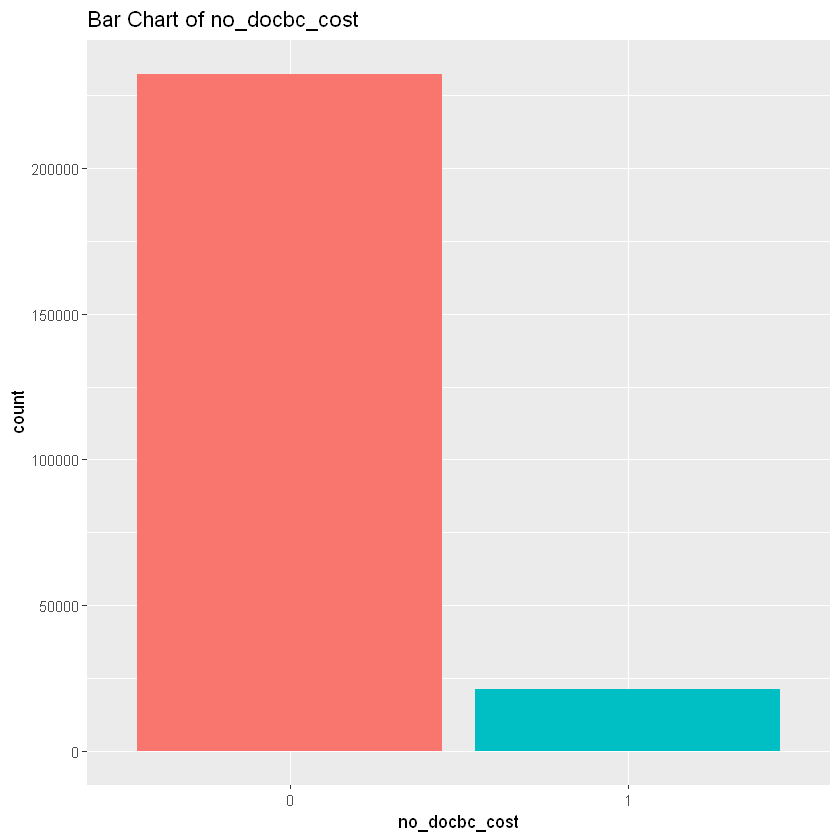

In [23]:
plot_var = qualitative_vars[13]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Có một số ít quan sát (khoảng dưới 50.000) không có gặp bác sĩ trong vòng 12 tháng vì không có kinh phí.

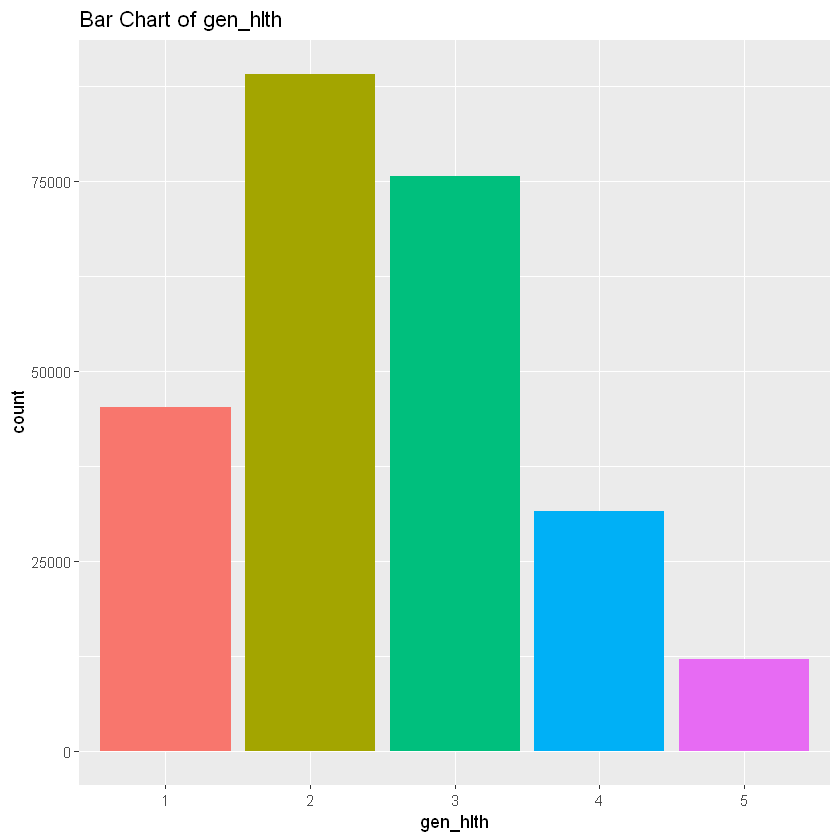

In [24]:
plot_var = qualitative_vars[14]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Đa số các tình trạng sức khỏe chung của quan sát đều ở mức `Very Good` và `Good`. 

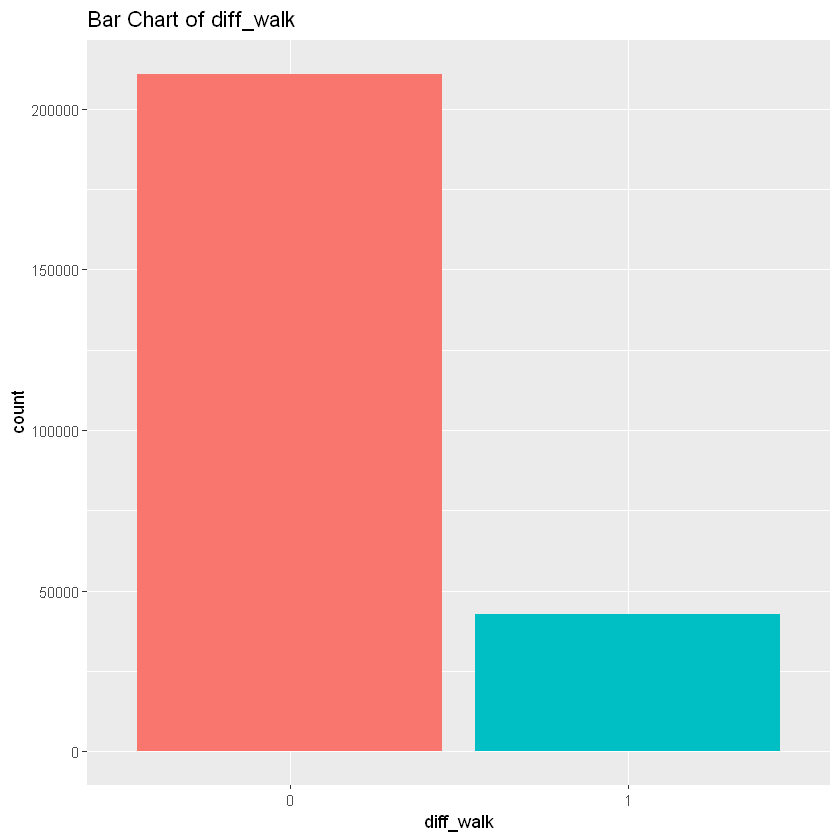

In [25]:
plot_var = qualitative_vars[15]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Có khoảng gần 50.000 quan sát gặp tình trạng khó khăn trong đi lại

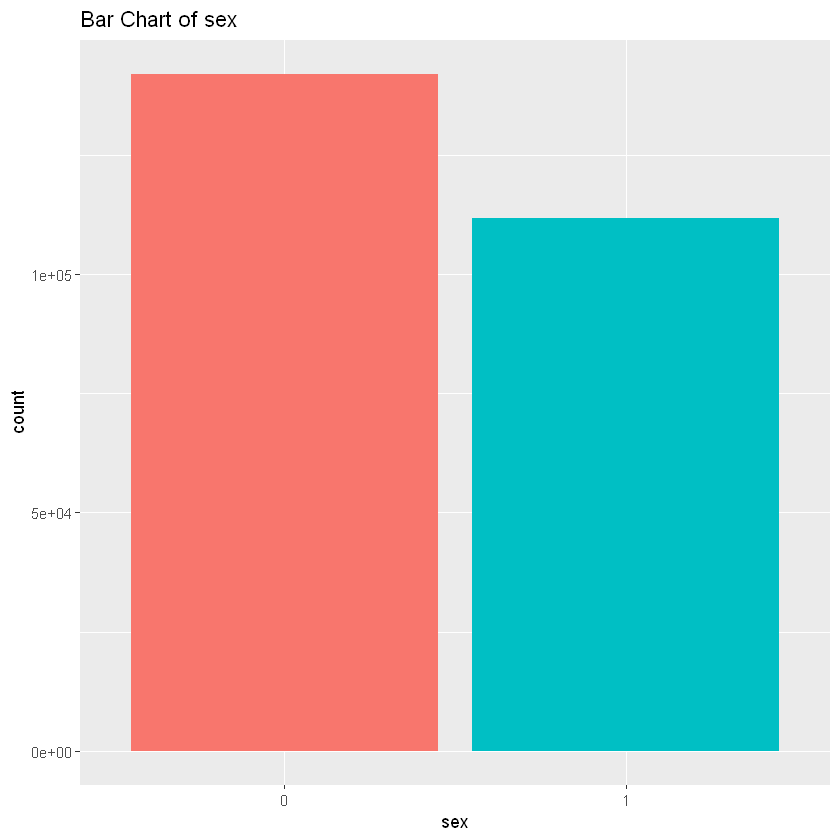

In [26]:
plot_var = qualitative_vars[16]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Lấy mẫu theo giới tính khá là đồng đều, không có sự chênh lệch lớn

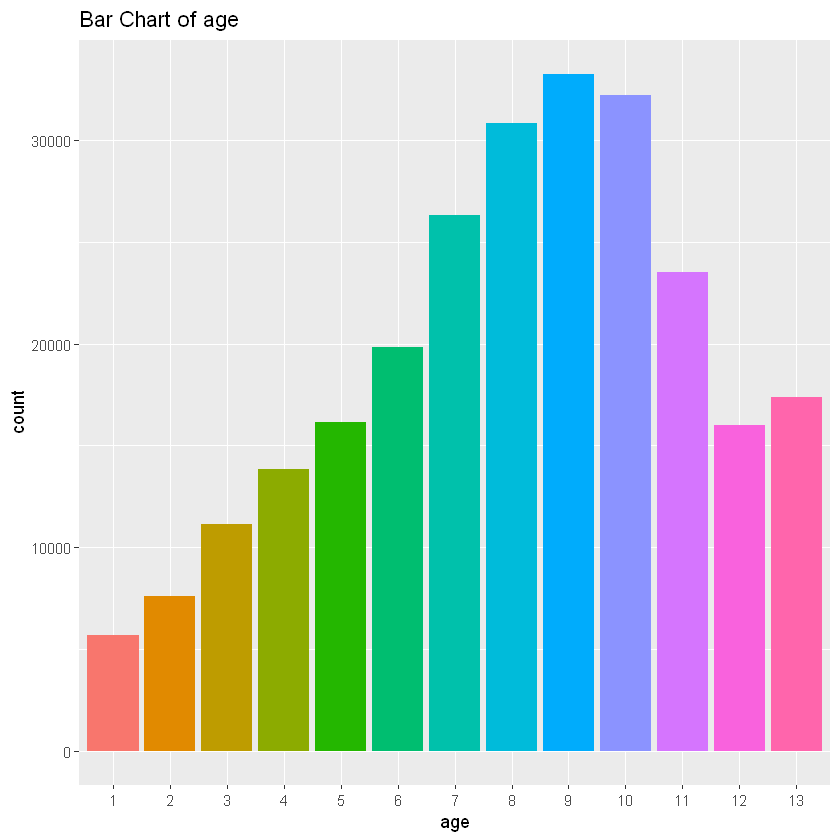

In [27]:
plot_var = qualitative_vars[17]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Số lượng người tăng dần từ nhóm 1 đến nhóm 10, đạt đỉnh tại nhóm tuổi 10. Sau nhóm 10, số lượng người bắt đầu giảm dần ở các nhóm 11, 12, và 13.

Nhóm tuổi 10 có số lượng người cao nhất trong dataset. Các nhóm tuổi từ 1 đến 5 có số lượng người tham gia thấp hơn so với các nhóm từ 6 đến 10, cho thấy nhóm trung niên hoặc lớn tuổi chiếm tỷ lệ cao hơn.

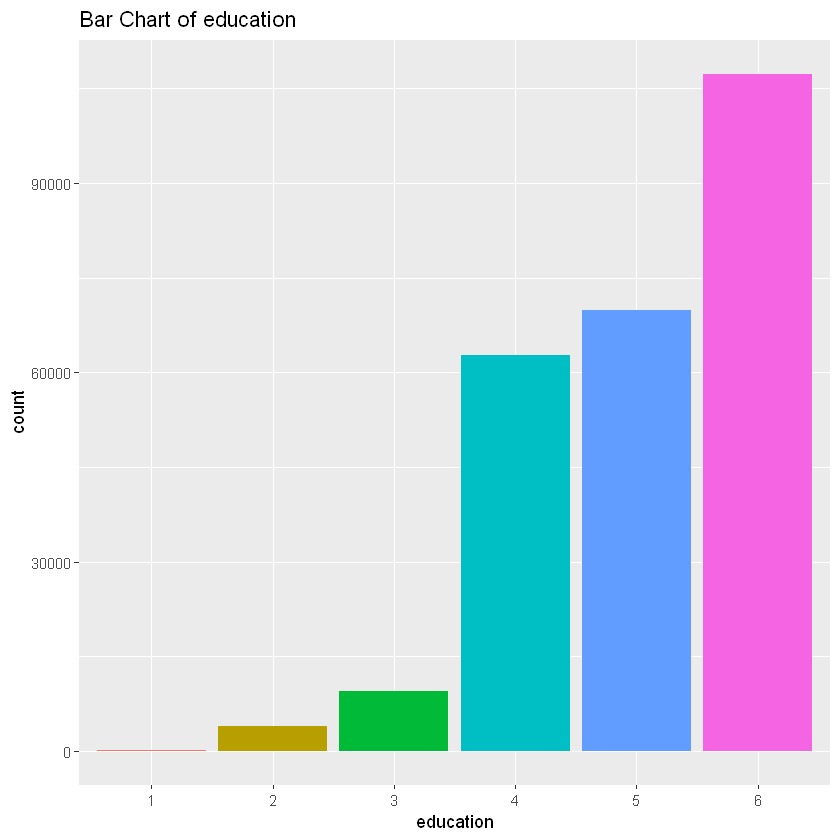

In [28]:
plot_var = qualitative_vars[18]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

Biểu đồ cho thấy số lượng người tham gia tăng dần theo trình độ học vấn, với các nhóm giáo dục từ 1 đến 6. 
- Nhóm 6 (học vấn cao nhất) có số lượng người tham gia cao nhất, vượt trội hơn hẳn so với các nhóm khác. 
- Nhóm 1 (học vấn thấp nhất) có số lượng người tham gia thấp nhất, gần như không đáng kể.
- Nhóm 4, 5, và 6 chiếm đa số, điều này có thể cho thấy rằng phần lớn người tham gia có trình độ học vấn từ trung học phổ thông trở lên.

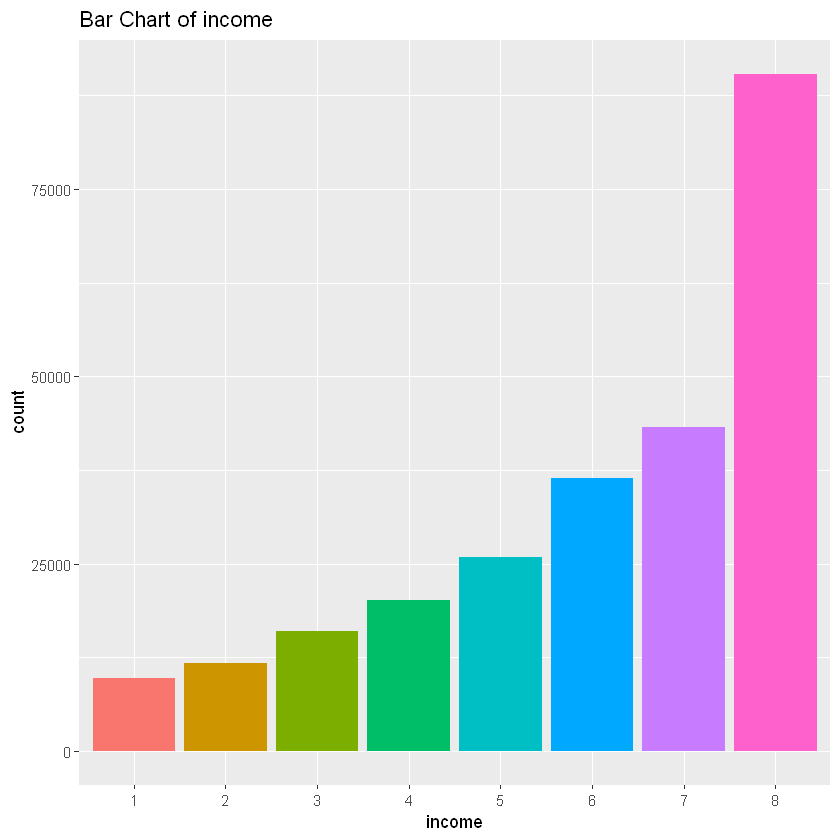

In [29]:
plot_var = qualitative_vars[19]

ggplot(data = data, aes_string(x = plot_var, fill = plot_var)) +
    geom_bar() +
    ggtitle(paste("Bar Chart of", plot_var)) +
    theme(legend.position = "none")

- Nhóm 8 (thu nhập cao nhất) chiếm tỷ lệ lớn nhất trong dataset, vượt trội hơn hẳn so với các nhóm khác.
- Nhóm 1, 2, và 3 (thu nhập thấp) có số lượng ít hơn đáng kể so với các nhóm thu nhập trung bình và cao hơn.
- Số lượng người tham gia có xu hướng tăng khi mức thu nhập tăng. Điều này có thể cho thấy những người có thu nhập cao hơn có xu hướng tham gia khảo sát nhiều hơn hoặc được tiếp cận dịch vụ khảo sát dễ dàng hơn.
- Số lượng người tăng dần từ nhóm thu nhập thấp (1-3) đến nhóm thu nhập trung bình (4-6), sau đó tăng mạnh ở nhóm thu nhập cao (7-8).

In [30]:
write.csv(data, "../data/cleaned_data.csv", row.names = FALSE)